In [21]:
import torch
dist = torch.distributions
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [61]:
dists = dist.Normal(loc = torch.tensor([-1., 4., 10.]), scale = torch.tensor([2., 1., 1.5]))

In [73]:
mixing = dist.Categorical(probs=torch.tensor([0.5, 0.25, 0.25]))

In [74]:
mixture = dist.MixtureSameFamily(mixture_distribution=mixing, component_distribution=dists)

In [76]:
samples = mixture.sample([2000])

<AxesSubplot:ylabel='Density'>

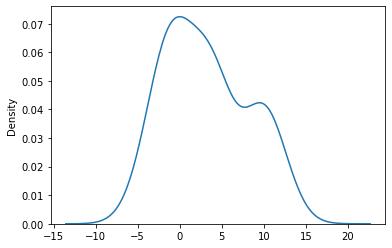

In [77]:
sns.kdeplot(samples, bw_adjust=2)

In [96]:
to_learn_locs = torch.tensor([0.0, 1.0, 2.0], requires_grad=True)
to_learn_scales = torch.tensor([1.0, 1.0, 1.0], requires_grad=True)
to_learn_scales_softplus = torch.functional.F.softplus(to_learn_scales)
to_learn_dists = dist.Normal(loc=to_learn_locs, scale=to_learn_scales_softplus)

to_learn_mix = torch.tensor([0.3, 0.4, 0.2], requires_grad=True)

to_learn_mixture = dist.Categorical(probs=to_learn_mix)
overall = dist.MixtureSameFamily(
    mixture_distribution=to_learn_mixture, component_distribution=to_learn_dists
)


def nll(loc, scale, mix):
    to_learn_scales_softplus = torch.functional.F.softplus(scale)
    to_learn_dists = dist.Normal(loc=loc, scale=to_learn_scales_softplus)
    mix_softmax = torch.functional.F.softmax(mix)
    to_learn_mixture = dist.Categorical(probs=mix_softmax)
    overall = dist.MixtureSameFamily(
        mixture_distribution=to_learn_mixture, component_distribution=to_learn_dists
    )
    return -torch.sum(overall.log_prob(samples))


opt = torch.optim.Adam([to_learn_locs, to_learn_scales, to_learn_mix], lr=0.05)
for i in range(101):
    loss =nll(to_learn_locs, to_learn_scales, to_learn_mix)
    if i % 10 == 0:
        print(f"Iteration: {i}, Loss: {loss.item():0.2f}")
    loss.backward()
    # loc_array.append(theta_learn_loc)
    # loss_array.append(loss_val.item())

    opt.step()
    opt.zero_grad()

Iteration: 0, Loss: 16368.27
Iteration: 10, Loss: 10628.43
Iteration: 20, Loss: 8328.17
Iteration: 30, Loss: 7339.84
Iteration: 40, Loss: 6849.51
Iteration: 50, Loss: 6566.24
Iteration: 60, Loss: 6376.24
Iteration: 70, Loss: 6226.55
Iteration: 80, Loss: 6086.78
Iteration: 90, Loss: 5958.18
Iteration: 100, Loss: 5888.01


/var/folders/1x/wmgn24mn1bbd2vgbqlk98tbc0000gn/T/ipykernel_48017/2345747116.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  mix_softmax = torch.functional.F.softmax(mix)


In [97]:
to_learn_locs

tensor([-1.6593,  6.8915,  4.1946], requires_grad=True)

In [100]:
to_learn_scales

tensor([1.4718, 3.8919, 2.9224], requires_grad=True)

In [102]:
s

tensor([0.3407, 0.3356, 0.1757], requires_grad=True)

In [104]:
torch.functional.F.softmax(to_learn_mix)

/var/folders/1x/wmgn24mn1bbd2vgbqlk98tbc0000gn/T/ipykernel_48017/1334526509.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  torch.functional.F.softmax(to_learn_mix)


tensor([0.3518, 0.3500, 0.2983], grad_fn=<SoftmaxBackward0>)